In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
X = datasets.load_iris().data

y = datasets.load_iris().target


In [0]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [0]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

def derSigmoide(y):
    return y * (1 - y)

def entrenamiento(Xj,Yj,W0,W1,W2):
  """Xj es un arreglo con 1 o mas casos """
  YY0, YY1, YYout = evalua(Xj, W0,W1,W2)
  errorOut = Yj - YYout
  """ d" en la capa de salida """
  dW2 = errorOut * derSigmoide(YYout)
  error1 = dW2.dot(W2.T)
  """ dW en la 2a capa oculta"""
  dW1 = error1 * derSigmoide(YY1)
  error0 = dW1.dot(W1.T)
  dW0 = error0 * derSigmoide(YY0)

  """ Calculando los ajustes """
  incW0 = Xj.T.dot(dW0)
  incW1 = YY0.T.dot(dW1)
  incW2 = YY1.T.dot(dW2)
  
  return incW0,incW1,incW2

def evalua(x,W0,W1,W2):
  Y0 = sigmoide(x.dot(W0))
  Y1 = sigmoide(Y0.dot(W1))
  Y2 = sigmoide(Y1.dot(W2))
  return Y0,Y1,Y2

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def clase(X):
  resp = np.zeros((150,3))
  R = np.argmax(X, axis=1)

  for i in range(0,150):
    resp[i][R[i]] = 1

  return resp

def matrizcon(Yv,Yp):
  resp = np.zeros((3,3))
  X = np.argmax(Yv, axis=1)
  Y = np.argmax(Yp, axis=1)

  for i in range(0,150):
    
    if Y[i] == X[i]:
      resp[X[i], Y[i]] = resp[X[i], Y[i]]+1
    
    else:
      resp[X[i], Y[i]] = resp[X[i], Y[i]]+1
      resp[Y[i], X[i]] = resp[Y[i], X[i]]+1

  return resp

X, y = unison_shuffled_copies(X,y)

In [40]:
X[:150:15]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.13888889, 0.45833333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.08333333],
       [0.19444444, 0.        , 0.42372881, 0.375     ],
       [0.63888889, 0.41666667, 0.57627119, 0.54166667],
       [0.33333333, 0.25      , 0.57627119, 0.45833333],
       [0.91666667, 0.41666667, 0.94915254, 0.83333333],
       [0.72222222, 0.5       , 0.79661017, 0.91666667],
       [0.94444444, 0.41666667, 0.86440678, 0.91666667]])

In [41]:
y[:150:15]

array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])

#One hot encoding

In [42]:
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = y.reshape(len(y), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
onehot_encoded.shape

(150, 3)

In [43]:
y[:150:15]

array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])

In [44]:
onehot_encoded[:150:15]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [45]:
np.random.seed(np.random.randint(0,100))

weight_0 = np.random.random((4,3)) - 0.5
weight_1 = np.random.random((3,2)) - 0.5
weight_2 = np.random.random((2,3)) - 0.5

results = []

for _ in range(500):

    i = np.random.randint(0,100)
    inc_weight_0, inc_weight_1, inc_weight_2 = entrenamiento(X[i].reshape((1,4)), y[i], weight_0, weight_1, weight_2)
    
    weight_0 =  weight_0 + inc_weight_0
    weight_1 =  weight_1 + inc_weight_1
    weight_2 =  weight_2 + inc_weight_2
    
    _, _, values = evalua(X, weight_0, weight_1, weight_2)
    YR = clase(values)
    mat=matrizcon(onehot_encoded, YR)
    print("Matriz de confusion Epoca ",i+1," :\n",mat,"\n\n")
    X_ = np.argmax(onehot_encoded, axis=1)
    
    Y = np.argmax(YR, axis=1)
    print("X", X_)
    print("y", Y)
    results.append(np.sum((X_==Y)*1)/150.0)


print(results)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 2 2]
y [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Matriz de confusion Epoca  59  :
 [[ 0. 50.  0.]
 [50. 50. 50.]
 [ 0. 50.  0.]] 


X [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 

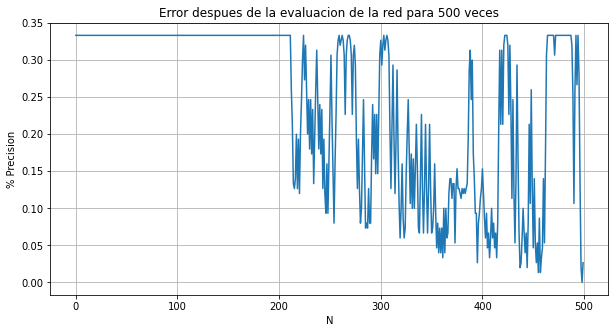

In [46]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(np.arange(500), results)
plt.title("Error despues de la evaluacion de la red para 500 veces")
plt.xlabel("N")
plt.ylabel("% Precision")
plt.grid()